# Amazon Instance Spot Price Project CS6266

In [1]:
#Import the necesary Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15.0,15.0]

In [2]:
#Read the data from the csv files of Asia Pacific
northeast1 = pd.read_csv("ap-northeast-1.csv")
northeast2 = pd.read_csv("ap-northeast-2.csv")
south1 = pd.read_csv("ap-south-1.csv")
southeast1 = pd.read_csv("ap-southeast-1.csv")
southeast2 = pd.read_csv("ap-southeast-2.csv")

In [3]:
#Read the data from the csv files of Central, North and South America
cacentral1 = pd.read_csv("ca-central-1.csv")
saeast1 = pd.read_csv("sa-east-1.csv")
useast1 = pd.read_csv("us-east-1.csv")
uswest1 = pd.read_csv("us-west-1.csv")

In [4]:
#Read the data from the csv files of Europe
eucentral1 = pd.read_csv("eu-central-1.csv")
euwest1 = pd.read_csv("eu-west-1.csv")

In [5]:
#Get the array of unique names of instances in the data
print(southeast1.InstanceType.unique())

['i2.xlarge' 'm4.10xlarge' 'c4.4xlarge' 'r3.4xlarge' 'c3.4xlarge'
 'r3.xlarge' 'm4.16xlarge' 'm4.4xlarge' 'm3.xlarge' 'c3.2xlarge'
 'c3.8xlarge' 'c3.large' 'm4.xlarge' 'c3.xlarge' 'c4.2xlarge' 'r4.4xlarge'
 'm3.2xlarge' 'c4.large' 'r3.8xlarge' 'm4.large' 'i3.large' 'r4.16xlarge'
 'c4.xlarge' 'r4.8xlarge' 'r3.2xlarge' 'm3.medium' 'c4.8xlarge'
 'm1.xlarge' 'm2.2xlarge' 'd2.8xlarge' 'm4.2xlarge' 'r3.large' 'r4.large'
 'r4.2xlarge' 'm2.xlarge' 'i3.xlarge' 'i3.8xlarge' 'i3.2xlarge'
 'c1.xlarge' 'r4.xlarge' 'm3.large' 'g2.8xlarge' 'c1.medium' 'i2.8xlarge'
 'm1.large' 'm1.medium' 'm1.small' 'i2.2xlarge' 'd2.4xlarge' 'g2.2xlarge'
 'd2.xlarge' 'd2.2xlarge' 'i3.4xlarge' 'i2.4xlarge' 't1.micro'
 'm2.4xlarge' 'i3.16xlarge' 'x1.32xlarge' 'x1.16xlarge']


In [6]:
#Need to do a basic time plot to see variation of prices 
#by region for a particular type of instance
instanceType = 'm4.10xlarge'

In [7]:
#Preprocessing for Asia Pacific
df1 = northeast1[northeast1.InstanceType==instanceType]
df1 = df1.set_index(pd.to_datetime(df1['Time']))
df2 = northeast2[northeast2.InstanceType==instanceType]
df2 = df2.set_index(pd.to_datetime(df2['Time']))
df3 = south1[south1.InstanceType==instanceType]
df3 = df3.set_index(pd.to_datetime(df3['Time']))
df4 = southeast1[southeast1.InstanceType==instanceType]
df4 = df4.set_index(pd.to_datetime(df4['Time']))
df5 = southeast2[southeast2.InstanceType==instanceType]
df5 = df5.set_index(pd.to_datetime(df5['Time']))

In [8]:
#Pre processing for Central, North and South America
df6 = cacentral1[cacentral1.InstanceType==instanceType]
df6 = df6.set_index(pd.to_datetime(df6['Time']))
df9 = saeast1[saeast1.InstanceType==instanceType]
df9 = df9.set_index(pd.to_datetime(df9['Time']))
df10 = useast1[useast1.InstanceType==instanceType]
df10 = df10.set_index(pd.to_datetime(df10['Time']))
df11 = uswest1[uswest1.InstanceType==instanceType]
df11 = df11.set_index(pd.to_datetime(df11['Time']))

In [9]:
#Pre processing for Europe
df7 = eucentral1[eucentral1.InstanceType==instanceType]
df7 = df7.set_index(pd.to_datetime(df7['Time']))
df8 = euwest1[euwest1.InstanceType==instanceType]
df8 = df8.set_index(pd.to_datetime(df8['Time']))

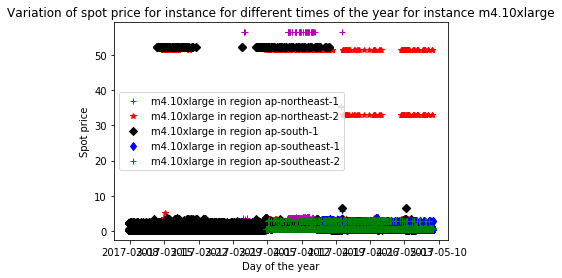

In [10]:
#Add prices from Asia Pacoific to the Plot
plt.plot(df1["SpotPrice"],'m+',label=instanceType+' in region ap-northeast-1')
plt.plot(df2["SpotPrice"],'r*',label=instanceType+' in region ap-northeast-2')
plt.plot(df3["SpotPrice"],'kD',label=instanceType+' in region ap-south-1')
plt.plot(df4["SpotPrice"],'bd',label=instanceType+' in region ap-southeast-1')
plt.plot(df5["SpotPrice"],'g+',label=instanceType+' in region ap-southeast-2')
#Generate the time plot
plt.ylabel('Spot price')
plt.xlabel('Day of the year')
plt.title('Variation of spot price for instance for different times of the year for instance {}'.format(instanceType))
plt.legend()
plt.show()

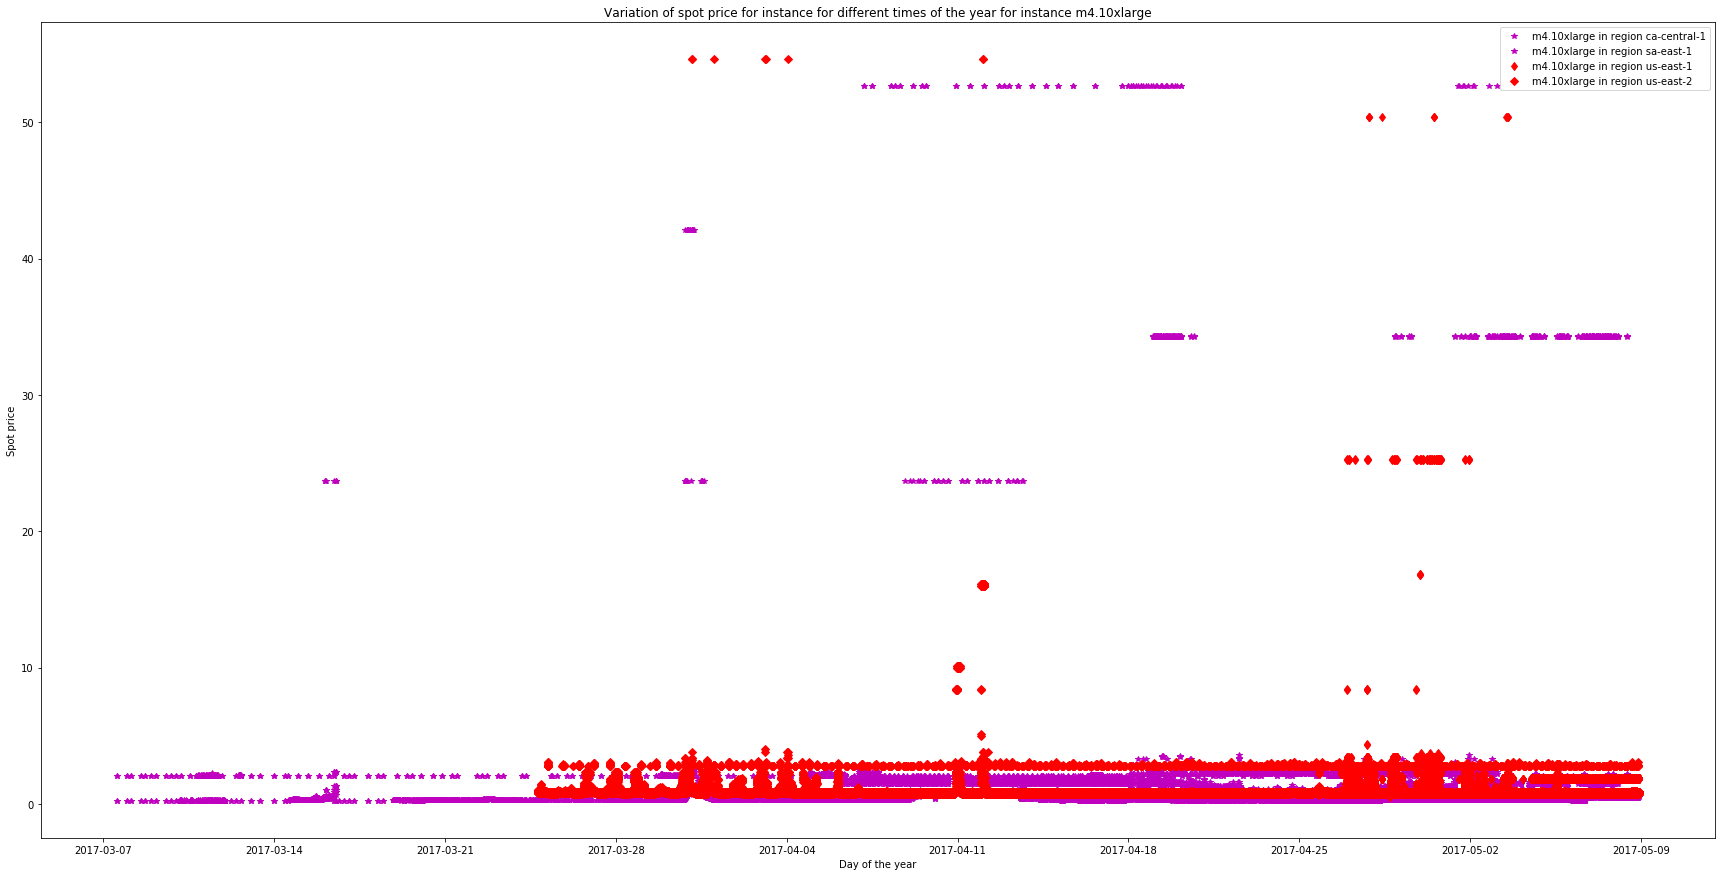

In [31]:
#Add prices from Central, North and South America to the plot
plt.plot(df6["SpotPrice"],'m*',label=instanceType+' in region ca-central-1')
plt.plot(df9["SpotPrice"],'m*',label=instanceType+' in region sa-east-1')
plt.plot(df10["SpotPrice"],'rd',label=instanceType+' in region us-east-1')
plt.plot(df11["SpotPrice"],'rD',label=instanceType+' in region us-east-2')
#Generate the time plot
plt.ylabel('Spot price')
plt.xlabel('Day of the year')
plt.title('Variation of spot price for instance for different times of the year for instance {}'.format(instanceType))
plt.legend()
plt.show()

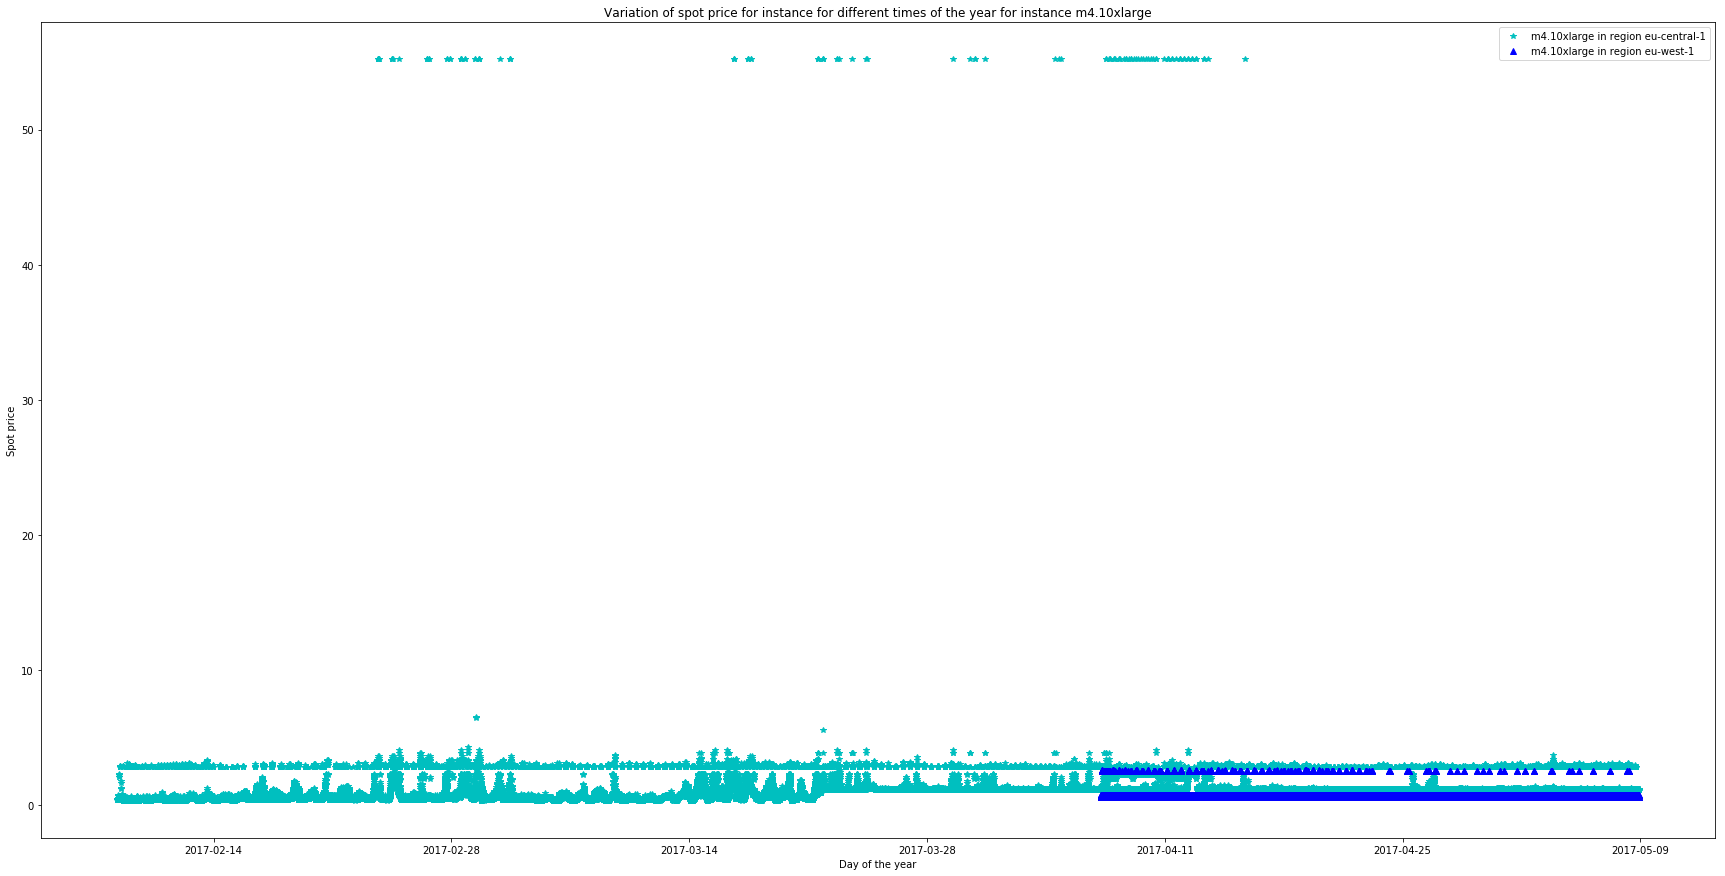

In [32]:
#Add prices from Europe to the plot
plt.plot(df7["SpotPrice"],'c*',label=instanceType+' in region eu-central-1')
plt.plot(df8["SpotPrice"],'b^',label=instanceType+' in region eu-west-1')
#Generate the time plot
plt.ylabel('Spot price')
plt.xlabel('Day of the year')
plt.title('Variation of spot price for instance for different times of the year for instance {}'.format(instanceType))
plt.legend()
plt.show()

In [13]:
#Since the time points are not measured in the same time interval,
#we cannot make any assumption on the general trend of the data
#Let's try to see the data at a per unit of time basis and see
#which regions have the lowest value for a particular type of instance
#and what is the stability of the data
#Note that the cheapest price can be approximately inferred from 
#the mean of the spot price in each region while the stability can be 
#inferred from the standard deviation of the spot price 

In [34]:
metric = 'mean'#'std''mean'
r1 = df1.groupby(df1.index.hour).agg({'SpotPrice':[metric]})
r2 = df2.groupby(df2.index.hour).agg({'SpotPrice':[metric]})
r3 = df3.groupby(df3.index.hour).agg({'SpotPrice':[metric]})
r4 = df4.groupby(df4.index.hour).agg({'SpotPrice':[metric]})
r5 = df5.groupby(df5.index.hour).agg({'SpotPrice':[metric]})
r6 = df6.groupby(df6.index.hour).agg({'SpotPrice':[metric]})
r7 = df7.groupby(df7.index.hour).agg({'SpotPrice':[metric]})
r8 = df8.groupby(df8.index.hour).agg({'SpotPrice':[metric]})
r9 = df9.groupby(df9.index.hour).agg({'SpotPrice':[metric]})
r10 = df10.groupby(df10.index.hour).agg({'SpotPrice':[metric]})
r11 = df11.groupby(df11.index.hour).agg({'SpotPrice':[metric]})

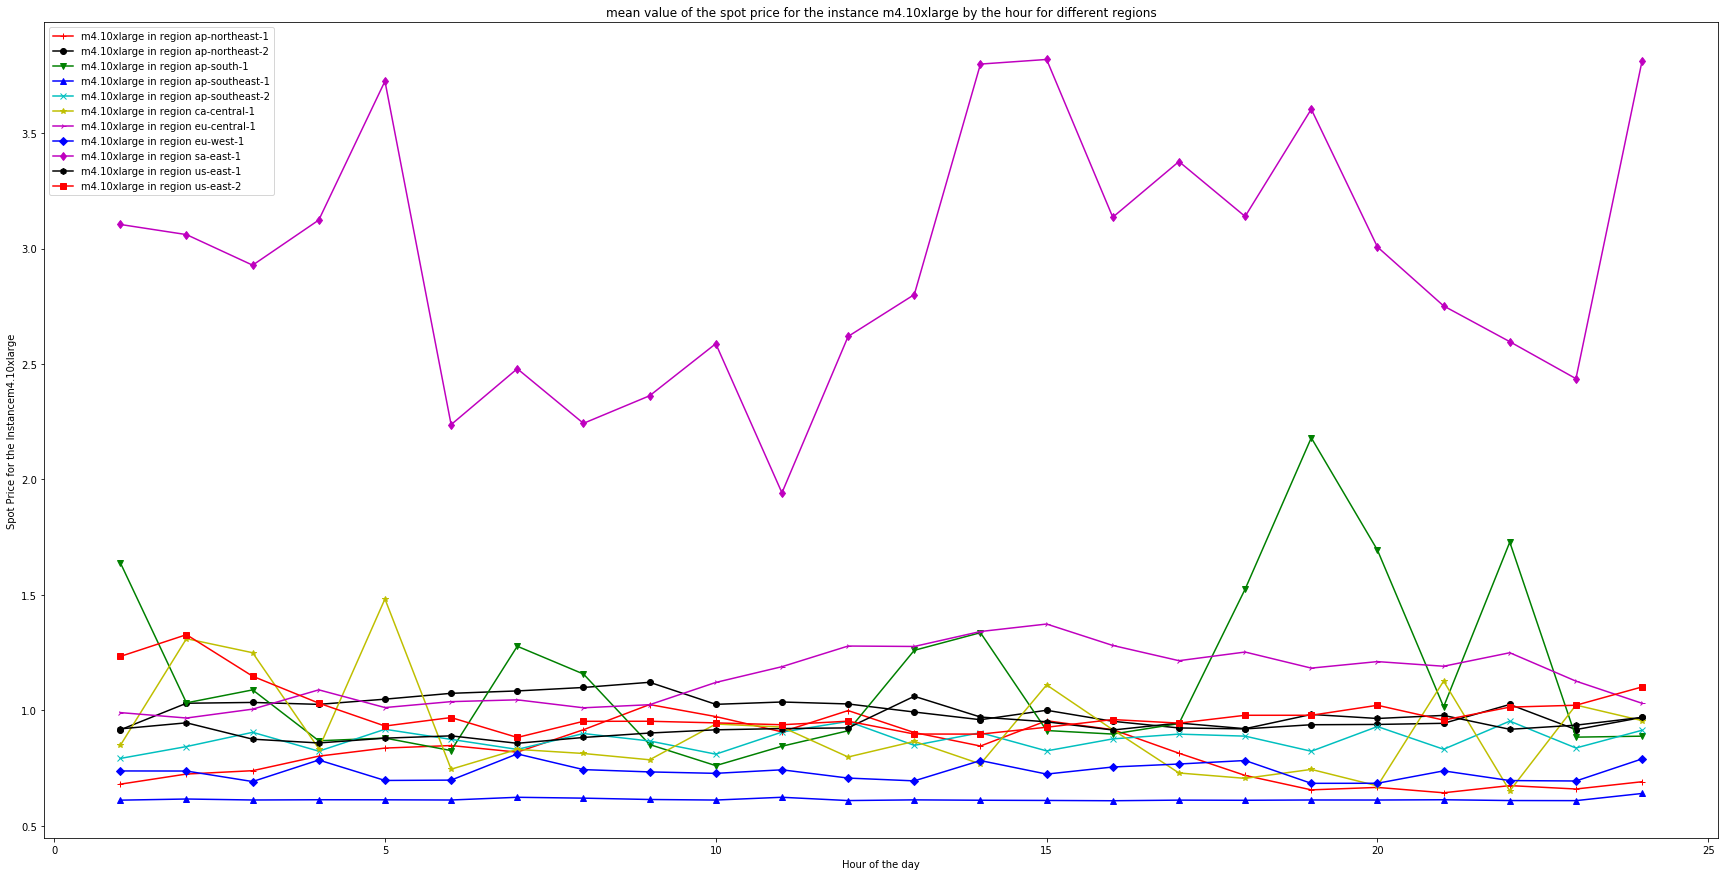

In [35]:
plt.plot(range(1,25),r1,'r+-',label=instanceType+' in region ap-northeast-1')
plt.plot(range(1,25),r2,'ko-',label=instanceType+' in region ap-northeast-2')
plt.plot(range(1,25),r3,'gv-',label=instanceType+' in region ap-south-1')
plt.plot(range(1,25),r4,'b^-',label=instanceType+' in region ap-southeast-1')
plt.plot(range(1,25),r5,'cx-',label=instanceType+' in region ap-southeast-2')
plt.plot(range(1,25),r6,'y*-',label=instanceType+' in region ca-central-1')
plt.plot(range(1,25),r7,'m4-',label=instanceType+' in region eu-central-1')
plt.plot(range(1,25),r8,'bD-',label=instanceType+' in region eu-west-1')
plt.plot(range(1,25),r9,'md-',label=instanceType+' in region sa-east-1')
plt.plot(range(1,25),r10,'kh-',label=instanceType+' in region us-east-1')
plt.plot(range(1,25),r11,'rs-',label=instanceType+' in region us-east-2')

plt.xlabel('Hour of the day')
plt.ylabel('Spot Price for the Instance'+instanceType)
plt.title(metric+' value of the spot price for the instance '+instanceType+' by the hour for different regions')
plt.legend()
plt.show()

In [36]:
#Thus we can conclude that instance c4.8xlarge, us-east-1 is the cheapest place.
#Next, let us find the most stable region for c4.8xlarge

In [37]:
metric = 'std'#'std''mean'
r1 = df1.groupby(df1.index.hour).agg({'SpotPrice':[metric]})
r2 = df2.groupby(df2.index.hour).agg({'SpotPrice':[metric]})
r3 = df3.groupby(df3.index.hour).agg({'SpotPrice':[metric]})
r4 = df4.groupby(df4.index.hour).agg({'SpotPrice':[metric]})
r5 = df5.groupby(df5.index.hour).agg({'SpotPrice':[metric]})
r6 = df6.groupby(df6.index.hour).agg({'SpotPrice':[metric]})
r7 = df7.groupby(df7.index.hour).agg({'SpotPrice':[metric]})
r8 = df8.groupby(df8.index.hour).agg({'SpotPrice':[metric]})
r9 = df9.groupby(df9.index.hour).agg({'SpotPrice':[metric]})
r10 = df10.groupby(df10.index.hour).agg({'SpotPrice':[metric]})
r11 = df11.groupby(df11.index.hour).agg({'SpotPrice':[metric]})

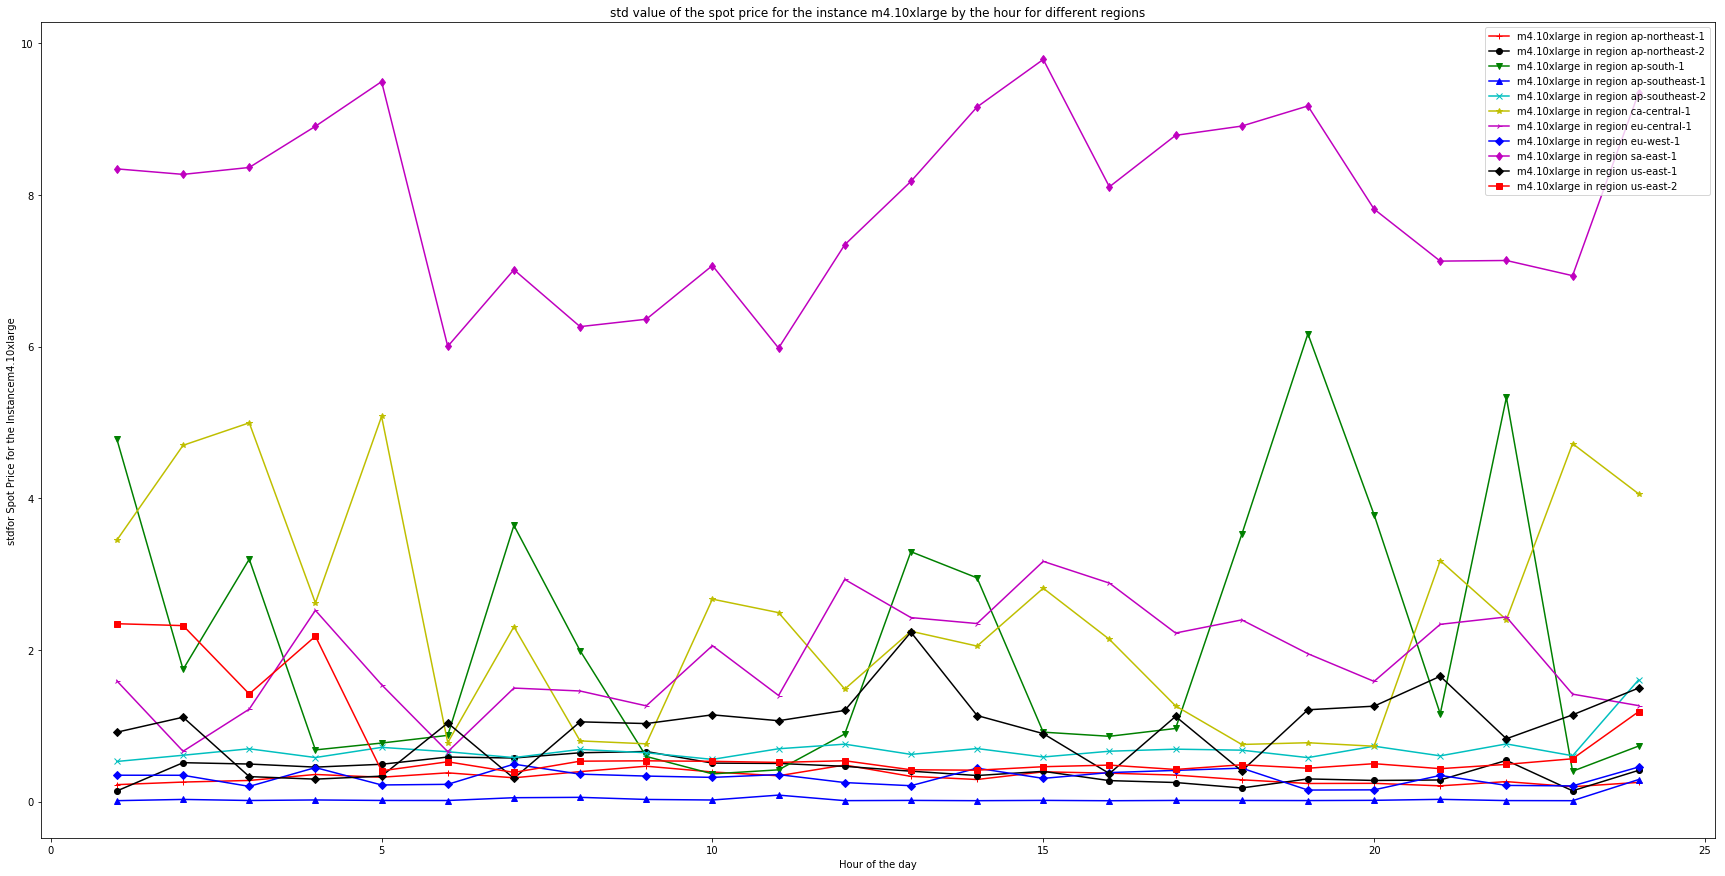

In [38]:
plt.plot(range(1,25),r1,'r+-',label=instanceType+' in region ap-northeast-1')
plt.plot(range(1,25),r2,'ko-',label=instanceType+' in region ap-northeast-2')
plt.plot(range(1,25),r3,'gv-',label=instanceType+' in region ap-south-1')
plt.plot(range(1,25),r4,'b^-',label=instanceType+' in region ap-southeast-1')
plt.plot(range(1,25),r5,'cx-',label=instanceType+' in region ap-southeast-2')
plt.plot(range(1,25),r6,'y*-',label=instanceType+' in region ca-central-1')
plt.plot(range(1,25),r7,'m4-',label=instanceType+' in region eu-central-1')
plt.plot(range(1,25),r8,'bD-',label=instanceType+' in region eu-west-1')
plt.plot(range(1,25),r9,'md-',label=instanceType+' in region sa-east-1')
plt.plot(range(1,25),r10,'kD-',label=instanceType+' in region us-east-1')
plt.plot(range(1,25),r11,'rs-',label=instanceType+' in region us-east-2')

plt.xlabel('Hour of the day')
plt.ylabel(metric+ 'for Spot Price for the Instance'+instanceType)
plt.title(metric+' value of the spot price for the instance '+instanceType+' by the hour for different regions')
plt.legend()
plt.show()

In [39]:
#Here we see that the eu-west-1 has the most stable spot price for c4.8xlarge for most of the time
#Except for 9am to arounf 12 pm when us-east-1 is most stable

In [40]:
#In order to see which region can has the SPOT price under certain threshold, so that we 
#do not lose the instance for atleast 6 to 8 hours, we need to look at the 
#different regions and the maximum value of the SPOT price at different time of the
#day

In [41]:
metric = 'max'#'std','mean'
r1 = df1.groupby(df1.index.hour).agg({'SpotPrice':[metric]})
r2 = df2.groupby(df2.index.hour).agg({'SpotPrice':[metric]})
r3 = df3.groupby(df3.index.hour).agg({'SpotPrice':[metric]})
r4 = df4.groupby(df4.index.hour).agg({'SpotPrice':[metric]})
r5 = df5.groupby(df5.index.hour).agg({'SpotPrice':[metric]})
r6 = df6.groupby(df6.index.hour).agg({'SpotPrice':[metric]})
r7 = df7.groupby(df7.index.hour).agg({'SpotPrice':[metric]})
r8 = df8.groupby(df8.index.hour).agg({'SpotPrice':[metric]})
r9 = df9.groupby(df9.index.hour).agg({'SpotPrice':[metric]})
r10 = df10.groupby(df10.index.hour).agg({'SpotPrice':[metric]})
r11 = df11.groupby(df11.index.hour).agg({'SpotPrice':[metric]})

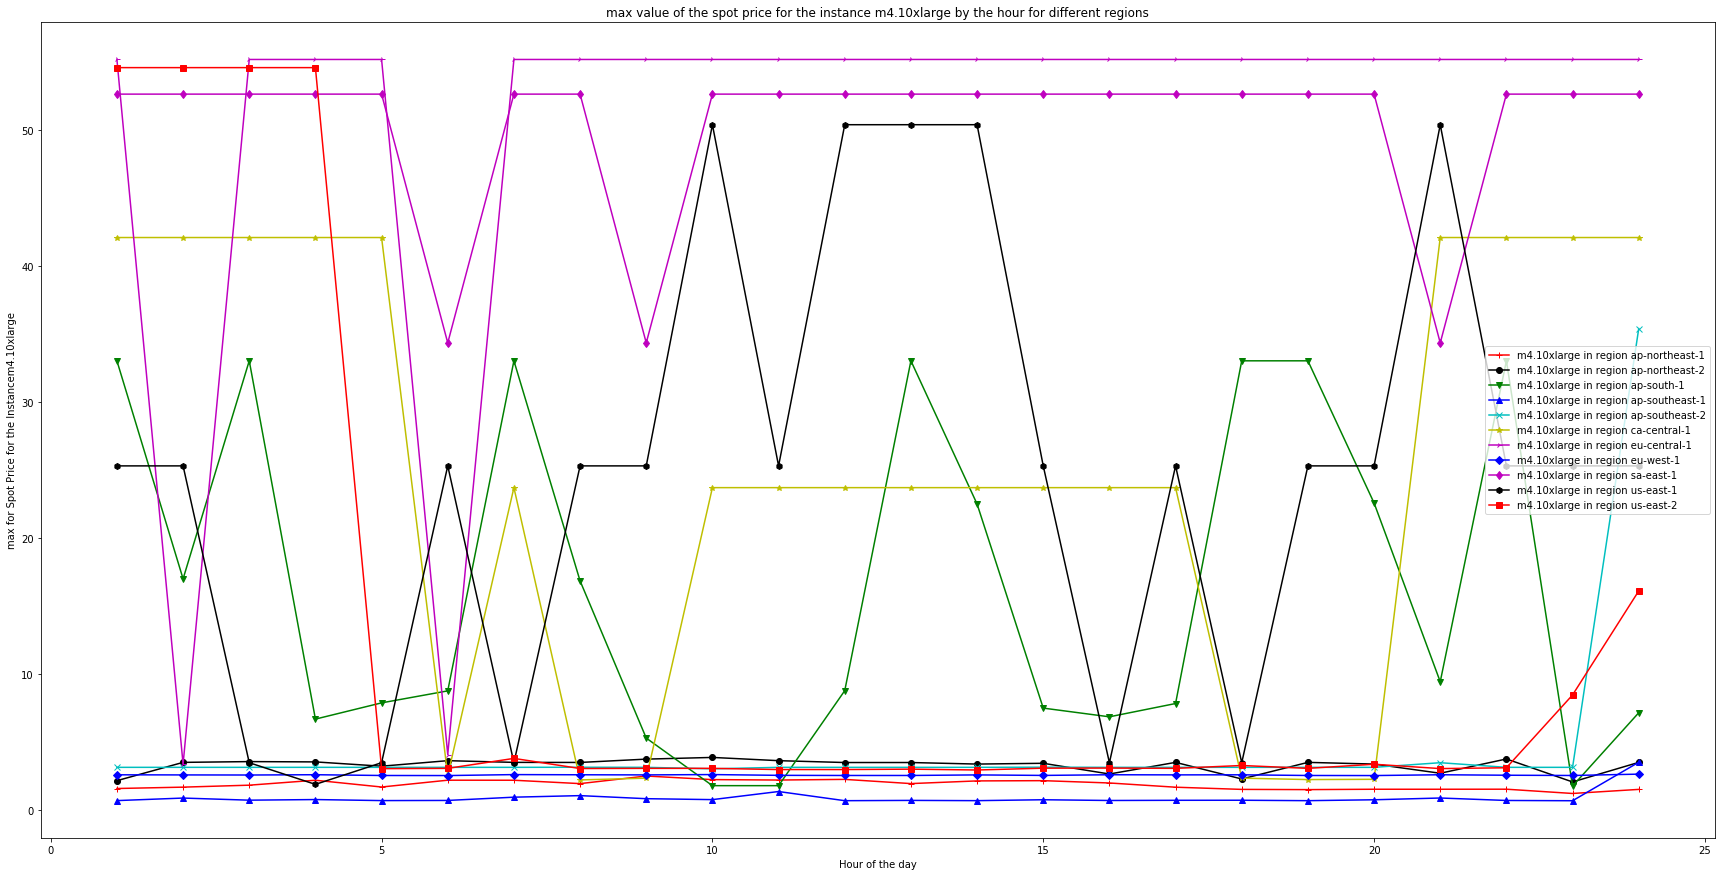

In [42]:
plt.plot(range(1,25),r1,'r+-',label=instanceType+' in region ap-northeast-1')
plt.plot(range(1,25),r2,'ko-',label=instanceType+' in region ap-northeast-2')
plt.plot(range(1,25),r3,'gv-',label=instanceType+' in region ap-south-1')
plt.plot(range(1,25),r4,'b^-',label=instanceType+' in region ap-southeast-1')
plt.plot(range(1,25),r5,'cx-',label=instanceType+' in region ap-southeast-2')
plt.plot(range(1,25),r6,'y*-',label=instanceType+' in region ca-central-1')
plt.plot(range(1,25),r7,'m4-',label=instanceType+' in region eu-central-1')
plt.plot(range(1,25),r8,'bD-',label=instanceType+' in region eu-west-1')
plt.plot(range(1,25),r9,'md-',label=instanceType+' in region sa-east-1')
plt.plot(range(1,25),r10,'kh-',label=instanceType+' in region us-east-1')
plt.plot(range(1,25),r11,'rs-',label=instanceType+' in region us-east-2')

plt.xlabel('Hour of the day')
plt.ylabel(metric+ ' for Spot Price for the Instance'+instanceType)
plt.title(metric+' value of the spot price for the instance '+instanceType+' by the hour for different regions')
plt.legend()
plt.show()

In [23]:
#Thus we notice that for c4.8xlarge, the maximum price of spot instance consistently stays
#below a certain threshold in the regions eu-west-1,us-east-2(though for a certain time in between 
#6am to 4pm)

In [43]:
df1 = southeast1[southeast1.InstanceType==instanceType]
#selecting Linux OS for the comparison as most prefer this
df1 = df1[df1.OS=='Linux/UNIX']
#Indexing by datatime
df1 = df1.set_index(pd.to_datetime(df1['Time']))
#Sorting the data by time since they are not sorted
df1 = df1.sort_values('Time')
#Removing the irrelevant labels since all of them are same except spot price and time index
df1.drop(labels=['Time','InstanceType','OS','Region'],inplace=True,axis=1)
'''
Creating a first order difference to find if price has changed between each recorded time point
Later we will group these changes in to 20 minute chunks to see how frequently 
price fluctuates or in this case increases
'''
df1["Change"] = df1["SpotPrice"].diff(-1)
#Thresholding so that increase in price is 1 and decrease is 0
mask1 = df1.Change > 0
df1.loc[mask1,'Change'] = 1
mask2 = df1.Change <= 0
df1.loc[mask2,'Change'] = 0
#binning the changing price data into 20min minute intervals and change is now in terms of probability
df1 = df1.resample('20T').mean()#1T=1minute,1H=1hour
#dropping intervals which have no data
df1.dropna(axis=0, how='any',inplace=True)
#Within a 20 minute range when the price is around 'SpotPrice', what is the probability of Price Inrease ('Change')?
r1 = df1.groupby(df1.SpotPrice).agg({'Change':[metric]})

In [44]:
# #Since similar spot price is present in different 20 minute intervals
# #we group the price by a bin
# metric = 'mean'
# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [15.0,15.0]
# r1 = df1.groupby(df1.SpotPrice).agg({'Change':[metric]})
# values = [i[0] for i in r1.values]
# axlabels = ['%.6f'%i for i in r1.index]
# fig, ax = plt.subplots()
# width = 0.8 # the width of the bars 
# ind = np.arange(len(axlabels))  # the x locations for the groups
# ax.plot(r1,color="blue",label='Probability of spot price increase')
# ##ax.bar(ind,values, width, color="blue",label='Probability of spot price increase')
# #ax.set_xticks(ind+width/2)
# #ax.set_xticklabels(axlabels, minor=False)
# plt.title('Probability of Spot Price Increase at different spot price Values(Non normalized Values)')
# plt.xlabel('Spot Price')
# plt.ylabel('Probability of Spot Price Increase') 
# plt.legend()
# plt.show()

In [45]:
df2 =northeast1[northeast1.InstanceType==instanceType]
#selecting Linux OS for the comparison as most prefer this
df2 = df2[df2.OS=='Linux/UNIX']
#Indexing by datatime
df2 = df2.set_index(pd.to_datetime(df2['Time']))
#Sorting the data by time since they are not sorted
df2 = df2.sort_values('Time')
#Removing the irrelevant labels since all of them are same except spot price and time index
df2.drop(labels=['Time','InstanceType','OS','Region'],inplace=True,axis=1)
'''
Creating a first order difference to find if price has changed between each recorded time point
Later we will group these changes in to 20 minute chunks to see how frequently 
price fluctuates or in this case increases
'''
df2["Change"] = df2["SpotPrice"].diff(-1)
#Thresholding so that increase in price is 1 and decrease is 0
mask1 = df2.Change > 0
df2.loc[mask1,'Change'] = 1
mask2 = df2.Change <= 0
df2.loc[mask2,'Change'] = 0
#binning the changing price data into 20min minute intervals and change is now in terms of probability
df2 = df2.resample('20T').mean()#1T=1minute,1H=1hour
#dropping intervals which have no data
df2.dropna(axis=0, how='any',inplace=True)
#Within a 20 minute range when the price is around 'SpotPrice', what is the probability of Price Inrease ('Change')?
r2 = df2.groupby(df2.SpotPrice).agg({'Change':[metric]})

In [46]:
# #Since similar spot price is present in different 20 minute intervals
# #we group the price by a bin
# metric = 'mean'
# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = [15.0,15.0]
# r2 = df2.groupby(df2.SpotPrice).agg({'Change':[metric]})
# values = [i[0] for i in r2.values]
# axlabels = ['%.6f'%i for i in r2.index]
# fig, ax = plt.subplots()
# width = 0.8 # the width of the bars 
# ind = np.arange(len(axlabels))  # the x locations for the grou
# ax.plot(r2,color="blue",label='Probability of spot price increase')
# ##ax.bar(ind,values, width, color="red",label='Probability of spot price increase')
# #ax.set_xticks(ind+width/2)
# #ax.set_xticklabels(axlabels, minor=False)
# plt.title('Probability of Spot Price Increase at different spot price Values(Non normalized Values)')
# plt.xlabel('Spot Price')
# plt.ylabel('Probability of Spot Price Increase') 
# plt.legend()
# plt.show()

In [47]:
df3 =northeast2[northeast2.InstanceType==instanceType]
#selecting Linux OS for the comparison as most prefer this
df3 = df3[df3.OS=='Linux/UNIX']
#Indexing by datatime
df3 = df3.set_index(pd.to_datetime(df3['Time']))
#Sorting the data by time since they are not sorted
df3 = df3.sort_values('Time')
#Removing the irrelevant labels since all of them are same except spot price and time index
df3.drop(labels=['Time','InstanceType','OS','Region'],inplace=True,axis=1)
'''
Creating a first order difference to find if price has changed between each recorded time point
Later we will group these changes in to 20 minute chunks to see how frequently 
price fluctuates or in this case increases
'''
df3["Change"] = df3["SpotPrice"].diff(-1)
#Thresholding so that increase in price is 1 and decrease is 0
mask1 = df3.Change > 0
df3.loc[mask1,'Change'] = 1
mask2 = df3.Change <= 0
df3.loc[mask2,'Change'] = 0
#binning the changing price data into 20min minute intervals and change is now in terms of probability
df3 = df3.resample('20T').mean()#1T=1minute,1H=1hour
#dropping intervals which have no data
df3.dropna(axis=0, how='any',inplace=True)
#Within a 20 minute range when the price is around 'SpotPrice', what is the probability of Price Inrease ('Change')?
r3 = df3.groupby(df3.SpotPrice).agg({'Change':[metric]})

In [48]:
df4 = southeast2[southeast2.InstanceType==instanceType]
#selecting Linux OS for the comparison as most prefer this
df4 = df4[df4.OS=='Linux/UNIX']
#Indexing by datatime
df4 = df4.set_index(pd.to_datetime(df4['Time']))
#Sorting the data by time since they are not sorted
df4 = df4.sort_values('Time')
#Removing the irrelevant labels since all of them are same except spot price and time index
df4.drop(labels=['Time','InstanceType','OS','Region'],inplace=True,axis=1)
'''
Creating a first order difference to find if price has changed between each recorded time point
Later we will group these changes in to 20 minute chunks to see how frequently 
price fluctuates or in this case increases
'''
df4["Change"] = df4["SpotPrice"].diff(-1)
#Thresholding so that increase in price is 1 and decrease is 0
mask1 = df4.Change > 0
df4.loc[mask1,'Change'] = 1
mask2 = df4.Change <= 0
df4.loc[mask2,'Change'] = 0
#binning the changing price data into 20min minute intervals and change is now in terms of probability
df4 = df4.resample('20T').mean()#1T=1minute,1H=1hour
#dropping intervals which have no data
df4.dropna(axis=0, how='any',inplace=True)
#Within a 20 minute range when the price is around 'SpotPrice', what is the probability of Price Inrease ('Change')?
r4 = df4.groupby(df4.SpotPrice).agg({'Change':[metric]})

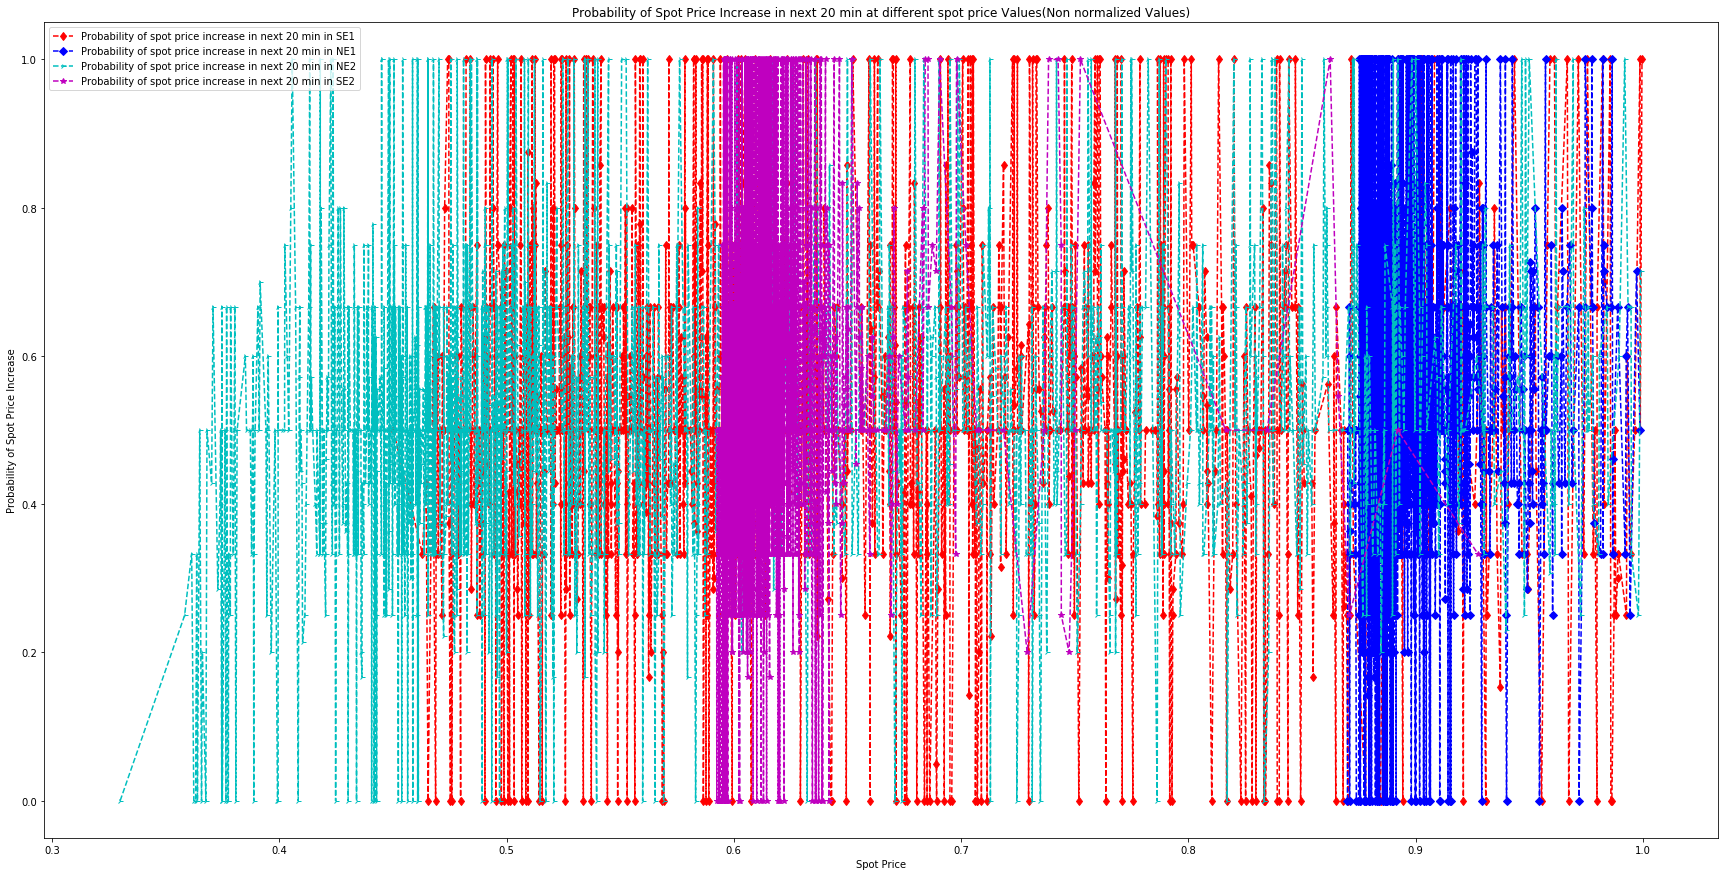

In [49]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30.0,15.0]
fig, ax = plt.subplots()
width = 0.8 # the width of the bars
ax.plot(r1[r1.index<=1],'rd--',label='Probability of spot price increase in next 20 min in SE1')
ax.plot(r2[r2.index<=1],'bD--',label='Probability of spot price increase in next 20 min in NE1')
ax.plot(r3[r3.index<=1],'c4--',label='Probability of spot price increase in next 20 min in NE2')
ax.plot(r4[r4.index<=1],'m*--',label='Probability of spot price increase in next 20 min in SE2')
plt.title('Probability of Spot Price Increase in next 20 min at different spot price Values(Non normalized Values)')
plt.xlabel('Spot Price')
plt.ylabel('Probability of Spot Price Increase') 
plt.legend()
plt.show()